<a href="https://colab.research.google.com/github/javier-jaime/Tool-Crib/blob/master/Colab/Stock_Price_Forecasting_with_yfinance_FB_Prophet_and_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Assignment: IBM Specialized Models
### Stock Price Forecasting with yfinance and Facebook Prophet

## Importing all the necessary Libraries

In [1]:
#!pip install yfinance
import yfinance as yf
import pandas as pd
import plotly.express as px
from fbprophet import Prophet
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [2]:
# Stock Ticker Input
stock = input('Enter the stock ticker: ')
print(f'You entered {stock}, here is the data from the last 10 days:')
period = '3y'
ticker = yf.Ticker(stock)
data = ticker.history(period)
data.reset_index(inplace=True)
data.tail(10)

Enter the stock ticker: TOU.TO
You entered TOU.TO, here is the data from the last 10 days:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
743,2021-07-13,33.990002,34.900002,33.610001,34.860001,920700,0.0,0
744,2021-07-14,34.880001,35.439999,34.400002,34.480000,1212900,0.0,0
745,2021-07-15,34.200001,34.900002,33.700001,33.959999,1047600,0.0,0
746,2021-07-16,35.200001,35.299999,33.240002,33.570000,1267300,0.0,0
747,2021-07-19,31.139999,33.759998,31.059999,33.299999,1496500,0.0,0
748,2021-07-20,33.400002,34.340000,33.240002,33.650002,896700,0.0,0
749,2021-07-21,34.080002,34.770000,33.709999,34.299999,1374900,0.0,0
750,2021-07-22,34.400002,34.470001,33.840000,34.110001,691800,0.0,0
751,2021-07-23,34.220001,34.840000,33.869999,34.770000,704900,0.0,0
752,2021-07-26,35.000000,36.009998,34.900002,35.049999,775284,0.0,0


In [3]:
print('These are the basic stats:')
data.describe()

These are the basic stats:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,753.000000,753.000000,753.000000,753.000000,7.530000e+02,753.000000,753.0
mean,17.424663,17.745975,17.100788,17.414396,1.285277e+06,0.001965,0.0
std,5.614929,5.685222,5.562863,5.624662,1.055763e+06,0.015655,0.0
min,6.882140,7.200222,6.486947,6.544780,1.218000e+05,0.000000,0.0
25%,13.137756,13.378726,12.886359,13.140881,7.665000e+05,0.000000,0.0
50%,16.725880,17.019788,16.461013,16.733917,1.072900e+06,0.000000,0.0
75%,19.562654,19.834048,19.280356,19.480240,1.490200e+06,0.000000,0.0
max,35.990002,36.180000,35.330002,36.139999,1.593540e+07,0.160000,0.0


# Data Visualization (plotly express) - Visualizing the historical performance

In [4]:
#Line graph (Price), Area graph (Volume) , box plot (Analyzing price and volume)

In [5]:
px.line(data, x="Date", y="Close", title=f'{stock} Stock Close Price')

In [6]:
px.bar(data, x="Date", y="Volume", title=f'{stock} Stock Volume')

In [7]:
px.box(data, y="Close", title=f'{stock} box plot', height=500, width=500)

## Data Preparation for Facebook Prophet
__[Facebook Prophet Documentation](https://facebook.github.io/prophet/)__. 

In [8]:
columns=['Date','Close']
prophet_df=pd.DataFrame(data,columns=columns)
prophet_df= prophet_df.rename(columns={'Date':'ds','Close':'y'})  
prophet_df.tail()

,ds,y
748,2021-07-20,33.650002
749,2021-07-21,34.299999
750,2021-07-22,34.110001
751,2021-07-23,34.770000
752,2021-07-26,35.049999


##Facebook Prophet Model

In [9]:
m=Prophet(yearly_seasonality=True)
m.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [10]:
periods = 10
future=m.make_future_dataframe(periods)

In [11]:
forecast=m.predict(future)

In [12]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-07-26,20.553021,19.634782,22.560180,20.553021,20.553021,0.551872,0.551872,0.551872,-0.494969,-0.494969,-0.494969,1.046841,1.046841,1.046841,0.0,0.0,0.0,21.104893
1,2018-07-27,20.531044,19.728934,22.649304,20.531044,20.531044,0.641855,0.641855,0.641855,-0.418319,-0.418319,-0.418319,1.060174,1.060174,1.060174,0.0,0.0,0.0,21.172899
2,2018-07-30,20.465113,19.650867,22.715276,20.465113,20.465113,0.643435,0.643435,0.643435,-0.464662,-0.464662,-0.464662,1.108097,1.108097,1.108097,0.0,0.0,0.0,21.108548
3,2018-07-31,20.443135,19.791602,22.603623,20.443135,20.443135,0.695594,0.695594,0.695594,-0.430360,-0.430360,-0.430360,1.125954,1.125954,1.125954,0.0,0.0,0.0,21.138729
4,2018-08-01,20.421158,19.725756,22.558018,20.421158,20.421158,0.727842,0.727842,0.727842,-0.416366,-0.416366,-0.416366,1.144209,1.144209,1.144209,0.0,0.0,0.0,21.149001
5,2018-08-02,20.399181,19.577599,22.442554,20.399181,20.399181,0.667481,0.667481,0.667481,-0.494969,-0.494969,-0.494969,1.162450,1.162450,1.162450,0.0,0.0,0.0,21.066662
6,2018-08-03,20.377204,19.640619,22.615258,20.377204,20.377204,0.761902,0.761902,0.761902,-0.418319,-0.418319,-0.418319,1.180220,1.180220,1.180220,0.0,0.0,0.0,21.139105
7,2018-08-07,20.289295,19.566605,22.616669,20.289295,20.289295,0.806138,0.806138,0.806138,-0.430360,-0.430360,-0.430360,1.236498,1.236498,1.236498,0.0,0.0,0.0,21.095433
8,2018-08-08,20.267318,19.489283,22.516888,20.267318,20.267318,0.827922,0.827922,0.827922,-0.416366,-0.416366,-0.416366,1.244288,1.244288,1.244288,0.0,0.0,0.0,21.095240
9,2018-08-09,20.245341,19.578142,22.458099,20.245341,20.245341,0.753623,0.753623,0.753623,-0.494969,-0.494969,-0.494969,1.248592,1.248592,1.248592,0.0,0.0,0.0,20.998964


In [13]:
px.line(forecast, x='ds',y='yhat', title=f'{stock} Stock Forecast')

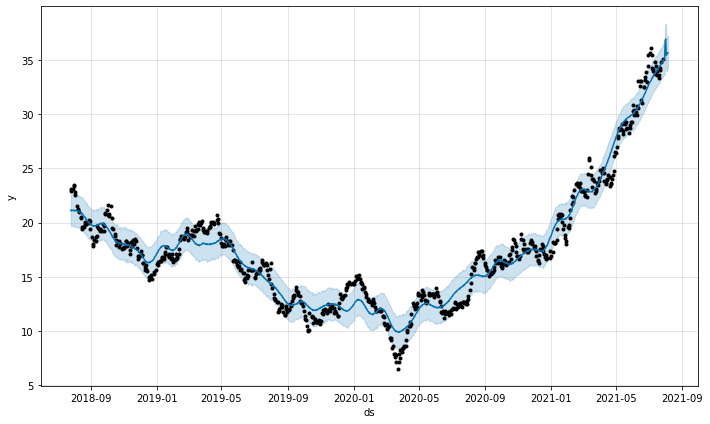

In [14]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

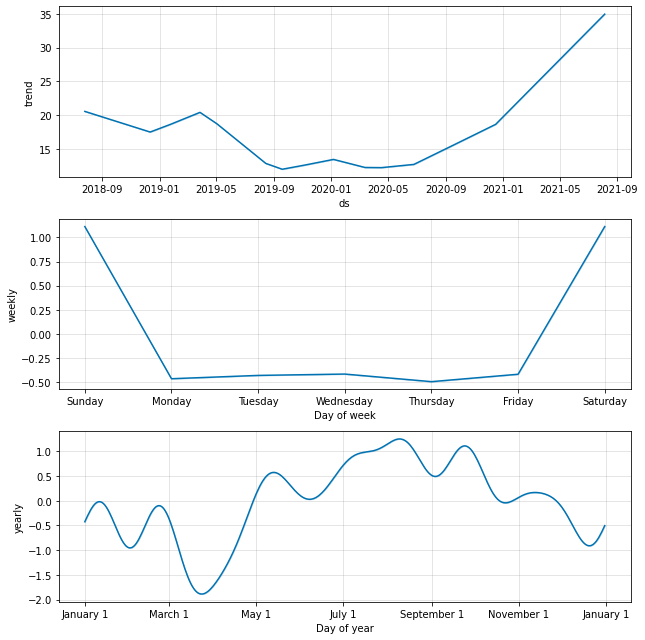

In [15]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [16]:
from google.colab import files
forecast.to_csv(f'{stock}_forecast.csv')
files.download(f'{stock}_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ARIMA Model (Advanced)
This is an Autoregressive Integrated Moving Average Model

In [45]:
#!pip install pmdarima
import pmdarima as pm
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

## Data Preparation for ARIMA

In [46]:
# Set stock ticker period to max 
arima_period = 'max'
arima_data = ticker.history(arima_period) # Same ticker as prophet model
print(stock)
arima_df=pd.DataFrame(arima_data,columns=['Close'])
arima_df.tail()

TOU.TO


,Close
Date,
2021-07-20,33.650002
2021-07-21,34.299999
2021-07-22,34.110001
2021-07-23,34.770000
2021-07-26,35.049999


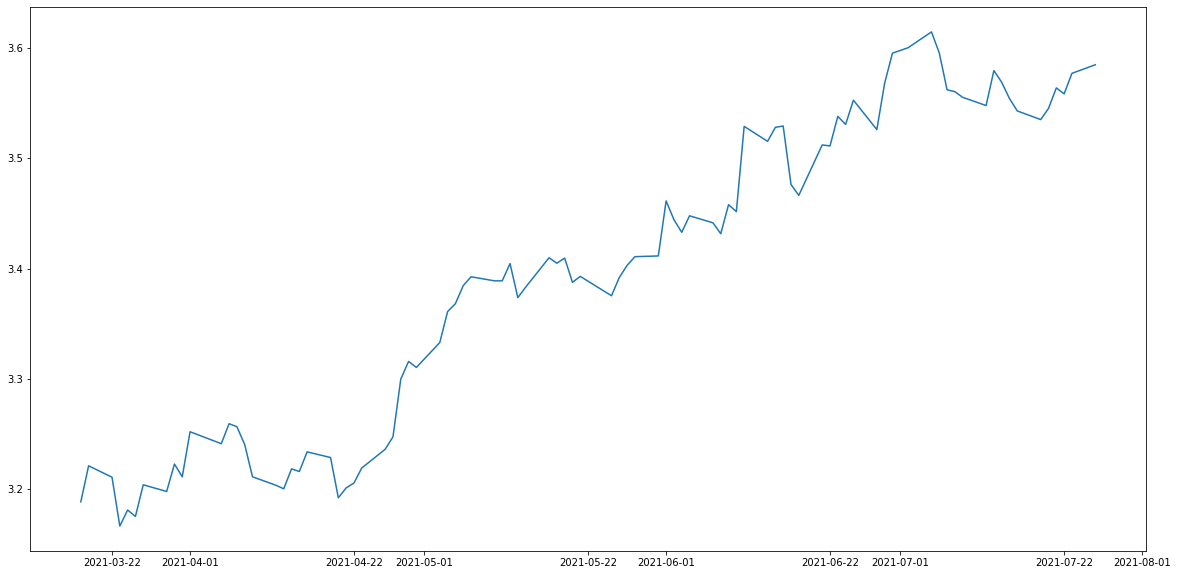

In [47]:
#to reduce the difference in variance we will take log of data

arima_df['log_close'] = np.log1p(arima_df['Close'])
# zoom in on last 30 days
plt.figure(figsize=(20,10))
plt.plot(arima_df['log_close'][-90:])

In [48]:
# Resample to Months
months_mean_close = arima_df['log_close'].resample('M').mean().to_frame()
months_mean_close.head()

,log_close
Date,
2010-11-30,2.974060
2010-12-31,2.983879
2011-01-31,3.087361
2011-02-28,3.128725
2011-03-31,3.179173


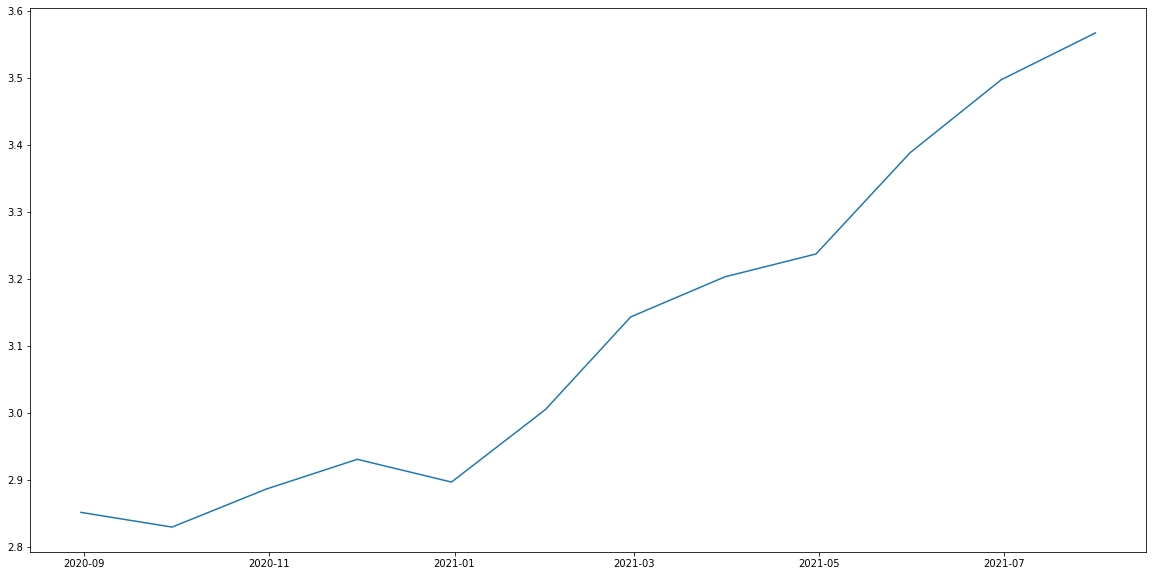

In [49]:
# zoom in on last 12 months
plt.figure(figsize=(20,10))
plt.plot(months_mean_close[-12:])

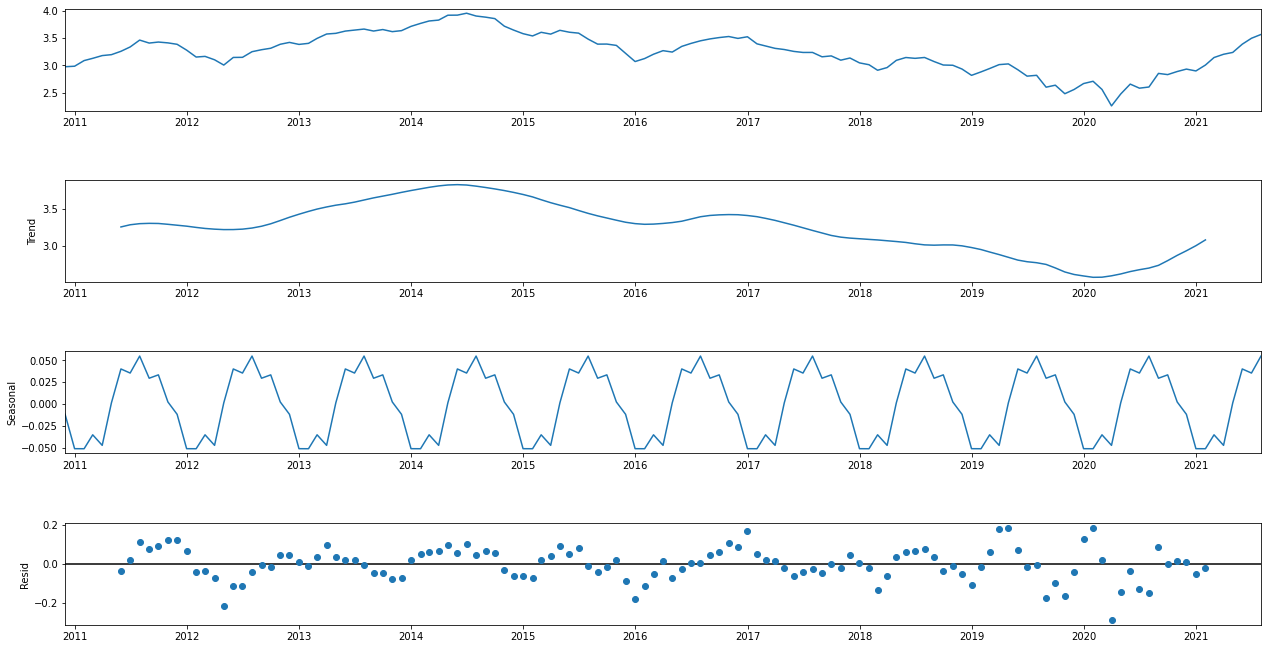

In [50]:
# plot decomposition with 12 months frequency to capture seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
figure = seasonal_decompose(months_mean_close,period=12).plot()
figure.set_size_inches(20, 10)

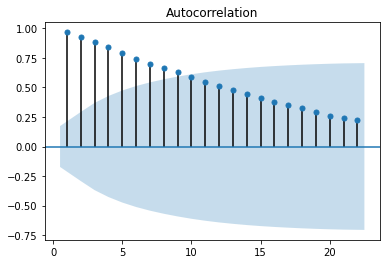

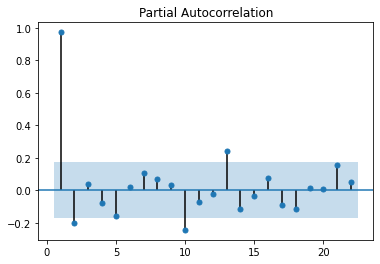

In [51]:
sm.tsa.graphics.plot_acf(months_mean_close,zero=False)
sm.tsa.graphics.plot_pacf(months_mean_close,zero=False);

In [52]:
months_mean_close['lag_12'] = months_mean_close.shift(12)
months_mean_close

,log_close,lag_12
Date,,
2010-11-30,2.974060,NaN
2010-12-31,2.983879,NaN
2011-01-31,3.087361,NaN
2011-02-28,3.128725,NaN
2011-03-31,3.179173,NaN
...,...,...
2021-03-31,3.203305,2.254911
2021-04-30,3.237439,2.473057
2021-05-31,3.388724,2.655171


In [53]:
months_mean_close['year_diff'] = months_mean_close['log_close'] - months_mean_close['lag_12']
months_mean_close['year_diff'].dropna().to_frame()

,year_diff
Date,
2011-11-30,0.412559
2011-12-31,0.295550
2012-01-31,0.065202
2012-02-29,0.035803
2012-03-31,-0.077093
...,...
2021-03-31,0.948394
2021-04-30,0.764382
2021-05-31,0.733553


In [54]:
# define Dickey-Fuller Test (DFT) function
# Null is that unit root is present, rejection means likely stationary
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)

Test Statistic           -1.621376
p-value                   0.472008
Lags Used                12.000000
Observations Used       104.000000
Critical Value (1%)      -3.494850
Critical Value (5%)      -2.889758
Critical Value (10%)     -2.581822
dtype: float64


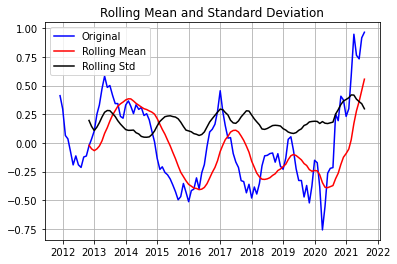

In [55]:
# rund DF test, p-value more than 0.05 we fail to reject the null of non stationarity
dftest(months_mean_close['year_diff'].dropna())

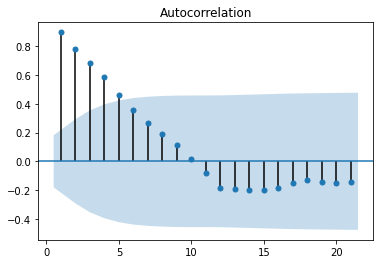

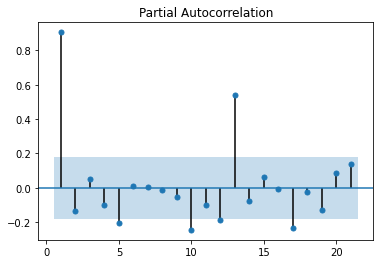

In [56]:
sm.tsa.graphics.plot_acf(months_mean_close['year_diff'].dropna(),zero=False)
sm.tsa.graphics.plot_pacf(months_mean_close['year_diff'].dropna(),zero=False);

## Create ARIMA Model

In [62]:
# Set Date Time Index to Daily Period
arima_df.index = pd.DatetimeIndex(arima_df.index).to_period('D')

In [63]:
sar = sm.tsa.statespace.SARIMAX(arima_df.log_close, 
                                order=(0,0,0), 
                                seasonal_order=(0,1,0,7), 
                                trend='c').fit()

print(sar.summary())

                                SARIMAX Results                                
Dep. Variable:               log_close   No. Observations:                 2678
Model:             SARIMAX(0, 1, 0, 7)   Log Likelihood                3778.678
Date:                 Mon, 26 Jul 2021   AIC                          -7553.356
Time:                         20:44:43   BIC                          -7541.576
Sample:                     11-23-2010   HQIC                         -7549.094
                          - 07-26-2021                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0015      0.001      1.345      0.178      -0.001       0.004
sigma2         0.0035   7.46e-05     46.370      0.000       0.003       0.004
Ljung-Box (L1) (Q):                2007.41  

Run the diagnostics with no lag

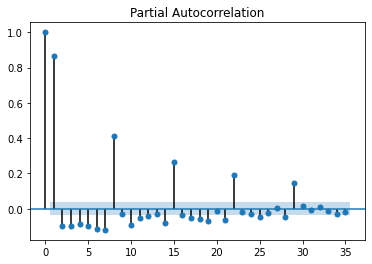

In [64]:
sm.tsa.graphics.plot_pacf(sar.resid[sar.loglikelihood_burn:]);

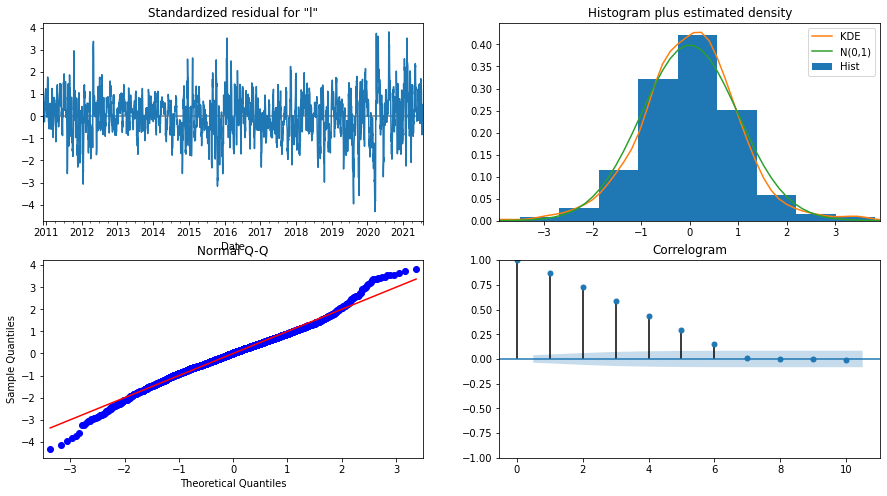

In [65]:
sar.plot_diagnostics(figsize = (15,8));

Create an Auto Model to find the best Model with Seasonality (Weekly)

In [33]:
auto_model = pm.auto_arima(arima_df.log_close, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=-7551.707, Time=2.53 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=-7553.356, Time=0.39 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-11898.019, Time=5.51 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-9557.116, Time=5.45 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=-7553.546, Time=0.24 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=-11261.326, Time=0.30 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=-12136.300, Time=25.18 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=21.92 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=12.53 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=-7550.011, Time=3.01 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=-12140.301, Time=21.41 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=-11904.423, Time=7.46 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=29.32 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=17.97 sec
 ARIMA(3,0,0)(2,1,0)[7] intercep

In [34]:
print('order: ',auto_model.order)
print('seasonal order: ',auto_model.seasonal_order)

order:  (3, 0, 0)
seasonal order:  (0, 1, 2, 7)


In [66]:
# Create second ARIMA model with the orders of the auto model
sar2 = sm.tsa.statespace.SARIMAX(arima_df.log_close, 
                                order=auto_model.order, 
                                seasonal_order=auto_model.seasonal_order, 
                                trend='c').fit()

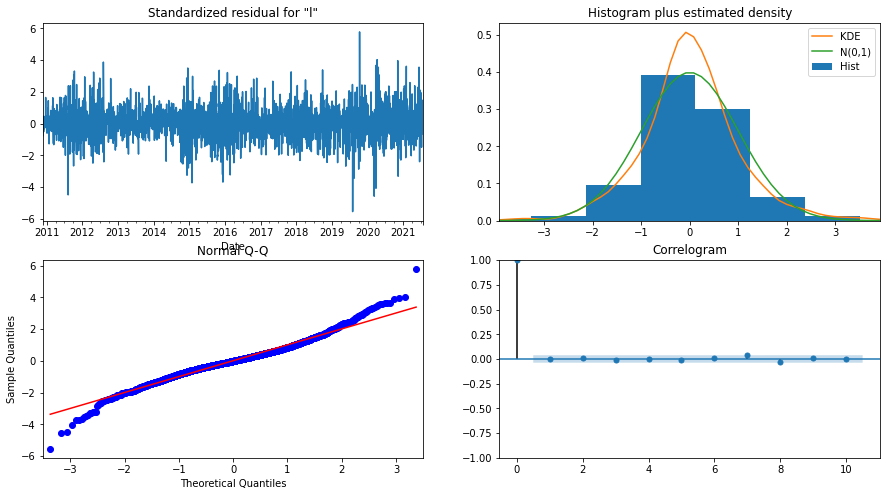

In [67]:
sar2.plot_diagnostics(figsize = (15,8));

In [68]:
# Helper function to cross validate
def cross_validate(series,horizon,start,step_size,order = (1,0,0),seasonal_order = (0,0,0,0),trend=None):
    '''
    Function to determine in and out of sample testing of arima model    
    
    arguments
    ---------
    series (series): time series input
    horizon (int): how far in advance forecast is needed
    start (int): starting location in series
    step_size (int): how often to recalculate forecast
    order (tuple): (p,d,q) order of the model
    seasonal_order (tuple): (P,D,Q,s) seasonal order of model
    
    Returns
    -------
    DataFrame: gives fcst and actuals with date of prediction
    '''
    fcst = []
    actual = []
    date = []
    for i in range(start,len(series)-horizon,step_size):
        model = sm.tsa.statespace.SARIMAX(series[:i+1], #only using data through to and including start 
                                order=order, 
                                seasonal_order=seasonal_order, 
                                trend=trend).fit()
        fcst.append(model.forecast(steps = horizon)[-1]) #forecasting horizon steps into the future
        actual.append(series[i+horizon]) # comparing that to actual value at that point
        date.append(series.index[i+horizon]) # saving date of that value
    return pd.DataFrame({'fcst':fcst,'actual':actual},index=date)

In [94]:
warnings.filterwarnings("ignore")
series = arima_df.log_close
horizon = 7
start = int(len(arima_df.log_close)*.75)
step_size = 1
order = auto_model.order
seasonal_order = auto_model.seasonal_order

log_cv1 = cross_validate(series,horizon,start,step_size,
                    order = order,
                    seasonal_order = seasonal_order)

In [95]:
# Exponent function to reverse the log
log_cv1 = np.expm1(log_cv1)

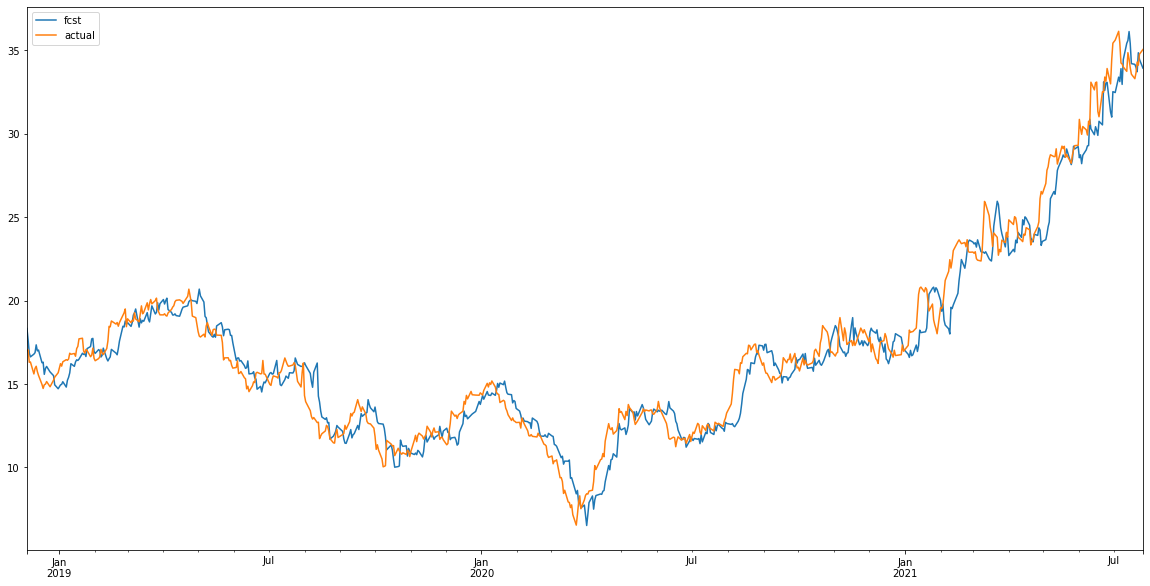

In [96]:
log_cv1.plot(figsize=(20,10))

In [97]:
#Defining an error metric to see out of sample accuracy (Mean absolute percentage error)
def mape(df_cv):
    return abs(df_cv.actual - df_cv.fcst).sum() / df_cv.actual.sum()

In [98]:
# Calculate error metric
mape(log_cv1)

0.05868636687201903